# Credit EDA Case Study

Problem Statement:

This is the loan credit history dataset of the bank. The bank has provided the details such as type of contract, income amount, income credit, organization type, etc. There are two types of risks involved:
- Applicant is likely to repay the loan, but the loan was not approved, i.e., Interest Loss
- Applicant is not likely to repay the loan, i.e., he/she are likely to default and the loan was approved, i.e., Credit Loss

The company wants to understand the "driving factors or vriables" behind the loan default. Put in other words, the variables which are strong indicators of default.

#### Data Provided:
2 Files containing customer details:
- application_data.csv --- data about the current application
- previous_application. csv ---- data about all the applications a customer may have submitted

#### Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 

import random

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)

#### Data Cleaning

#### Importing & Reading the dataset

In [2]:
df= pd.read_csv("application_data.csv")
# Reading the first 5 rows of the dataframe
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [3]:
# Finding out the number of rows & columns in the dataframe
df.shape 

(307511, 122)

In [4]:
# Printing the summary of the dataframe ---> showing the types of dtatypes, memory usage, column enteries
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
# Sorting the dataframe by unique values, done to identify the categorical and continuous columns
df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

#### Data cleaning in CODE_GENDER column

In [6]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [7]:
df['CODE_GENDER']=df['CODE_GENDER'].replace('XNA',np.nan) # Replacing the Null Values with NAN
df['CODE_GENDER']=df['CODE_GENDER'].dropna() # Dropping NAN values as they are negligible in mumber

In [8]:
df.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

#### Converting categorical columns to object type

In [9]:
columns=list(df[['TARGET','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21' ]])
df[columns]=df[columns].astype('object')
df['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: object

#### Changing the negative values in the dataframe to absolute

In [10]:
df['DAYS_EMPLOYED_abs']=df['DAYS_EMPLOYED'].abs()
df['DAYS_REGISTRATION_abs']=df['DAYS_REGISTRATION'].abs()
df['DAYS_ID_PUBLISH_abs']=df['DAYS_ID_PUBLISH'].abs()
df['DAYS_BIRTH_abs']=df['DAYS_BIRTH'].abs()
df['DAYS_BIRTH_abs']=df['DAYS_BIRTH_abs']/365
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_abs,DAYS_REGISTRATION_abs,DAYS_ID_PUBLISH_abs,DAYS_BIRTH_abs
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,637,3648.0,2120,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1188,1186.0,291,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,225,4260.0,2531,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3039,9833.0,2437,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary spec

#### Finding the percentage of NULL Values for each column

In [11]:
df.isnull().sum()/len(df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.001301
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Dropping columns with max NULL Values

In [12]:
df.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [13]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [14]:
df.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [15]:
df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

#### Checking for Outliers 
Columns Identified:
- AMT_INCOME_TOTAL
- AMT_ANNUITY
- AMT_GOODS_PRICE
- AMT_CREDIT
- DAYS_EMPLOYED_abs (Absolute column of DAYS_EMPLOYED)
- DAYS_BIRTH_abs (Absolute column of DAYS_BIRTH)

In [16]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

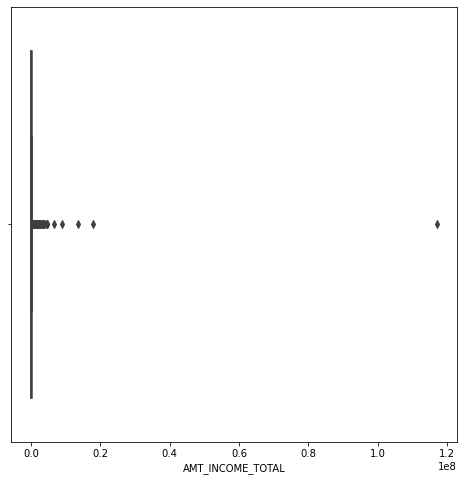

In [17]:
# Plotting boxplot for AMT_INCOME_TOTAL
plt.figure(figsize=(8,8))
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

#### The plot shows one dataset having major unusualness. That is an extremely high value of AMT_INCOME_TOTAL. There are other 4 outliers that are not that extreme, in comparison to the normal distribution of the dataset. These outliers need not be considered.

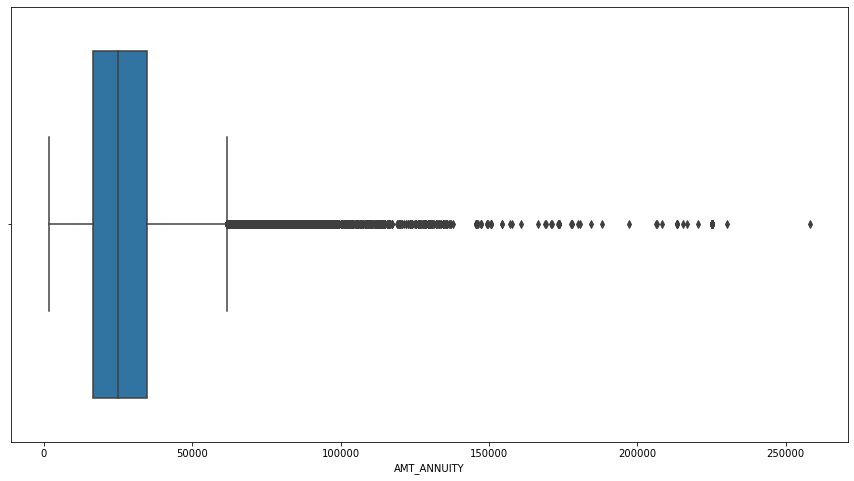

In [18]:
# PLotting boxplot for AMT_ANNUITY
plt.figure(figsize=(15,8))
sns.boxplot(df.AMT_ANNUITY)
plt.show()

#### Inferences: AMT_ANNUITY have more than 20% of outliers which can be imputed with mode value. The extreme value may not be considered as it would effect negatively on any anlaysis done.

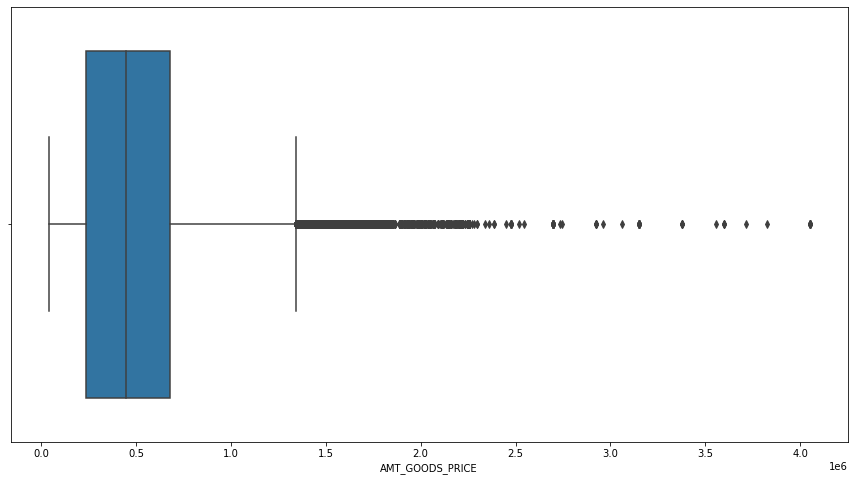

In [19]:
# Plotting boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(15,8))
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

**Inferences: AMT_GOODS_PRICE have more number of outliers which can be imputed with mode value**

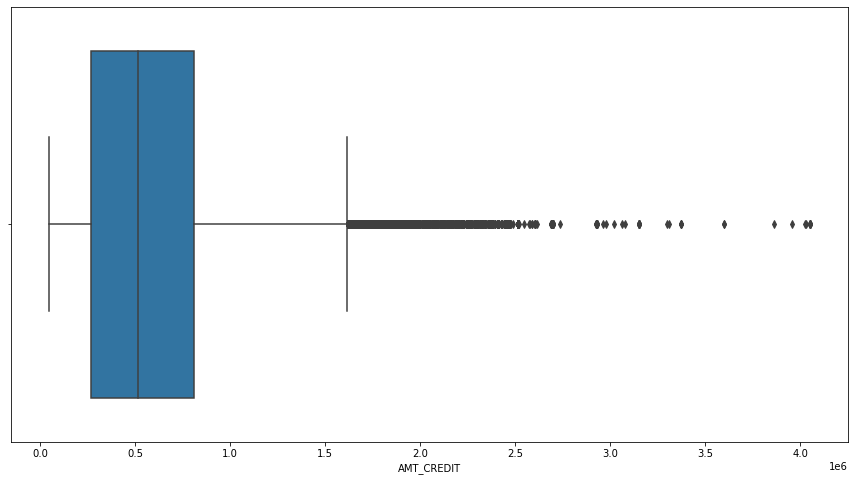

In [20]:
# Plotting boxplot for AMT_CREDIT
plt.figure(figsize=(15,8))
sns.boxplot(df.AMT_CREDIT)
plt.show()

#### AMT_CREDIT column too shows a pattern similar to both AMT_GOODS_PRICE & AMT_ANNUITY, a gradual increase in the outliers reaching the extreme dataset.

#### Plots for DAYS_EMPLOYED_abs & DAYS_BIRTH_abs columns. These columns have been changed from the original dataset to columns containing absolute because they had negative values

In [21]:
df['DAYS_EMPLOYED_abs']=df['DAYS_EMPLOYED_abs']/365
df.DAYS_EMPLOYED_abs.describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED_abs, dtype: float64

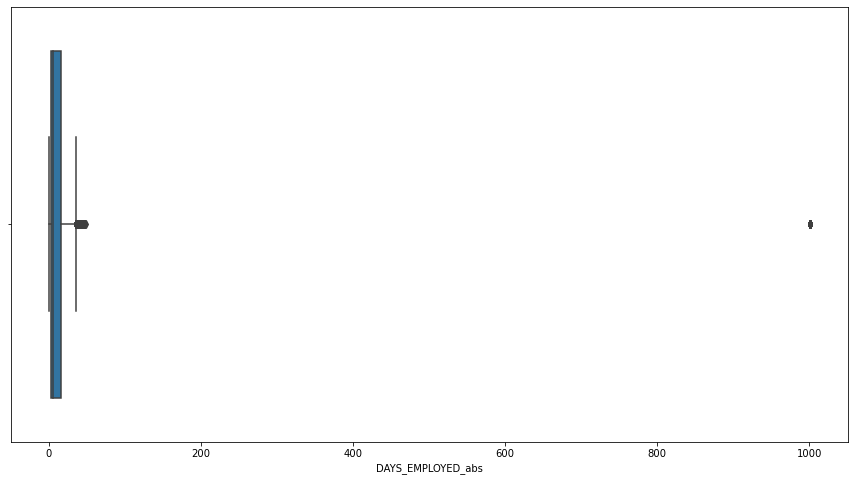

In [22]:
# Plotting boxplot for the column
plt.figure(figsize=(15,8))
sns.boxplot(df.DAYS_EMPLOYED_abs)
plt.show()

**Inferences: most customers are employed to current job is nearly 6-15 yrs and here outlires are presnt we can impute it with average**

In [23]:
df.DAYS_BIRTH_abs.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH_abs, dtype: float64

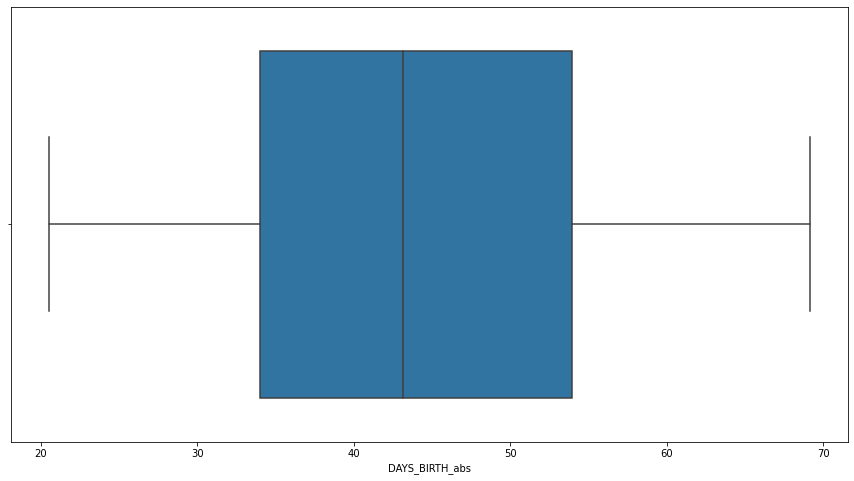

In [24]:
# Plotting the column DAYS_BIRTH_abs
plt.figure(figsize=(15,8))
sns.boxplot(df.DAYS_BIRTH_abs)
plt.show()

#### This column has a mean value of 43.93, with 34 as 25th percentile and 53.92 as 75th percentile. The minimum & maximum values are 20.51 & 69.12 respectively. 

#### Binning of columns AMT_INCOME_TOTAL & DAYS_BIRTH

In [25]:
df['AMT_INCOME_TOTAL_cat']=pd.cut(df.AMT_INCOME_TOTAL, bins=[25000,50000,70000,100000,5000000,20000000],labels=['LOW','MEDIUM','AVG','HIGH','VERY-HIGH'])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_abs,DAYS_REGISTRATION_abs,DAYS_ID_PUBLISH_abs,DAYS_BIRTH_abs,AMT_INCOME_TOTAL_cat
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.745205,3648.0,2120,25.920548,HIGH
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795,1186.0,291,45.931507,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.616438,4260.0,2531,52.180822,MEDIUM
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.326027,9833.0,2437,52.068493,HIGH
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Sec

In [26]:
df['DAYS_BIRTH_abs_cat']=pd.cut(df.DAYS_BIRTH_abs,bins=[20,30,40,50,75],labels=['20-30','30-40','40-50','50-75'])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_abs,DAYS_REGISTRATION_abs,DAYS_ID_PUBLISH_abs,DAYS_BIRTH_abs,AMT_INCOME_TOTAL_cat,DAYS_BIRTH_abs_cat
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.745205,3648.0,2120,25.920548,HIGH,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795,1186.0,291,45.931507,HIGH,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.616438,4260.0,2531,52.180822,MEDIUM,50-75
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.326027,9833.0,2437,52.068493,HIGH,50-75
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,W

#### Imbalance Percentage
- Dividing the dataset into 2 other dataframes
- Where Target = 1, meaning, the customer has defaulted on the loan, the dataset has been collected in a 'default' dataframe and similarly, where Target = 0, meaning, the customers have not defaulted on the loan, datasets have been collected to form 'NON_default'.

In [27]:
# Imbalance Percentage in the dataframe
df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [28]:
df1=df.iloc[:,:21]
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931


#### Converting the negative values into absolute values

In [29]:
df1['DAYS_EMPLOYED_abs']=df1['DAYS_EMPLOYED'].abs()
df1['DAYS_EMPLOYED_abs']=df1['DAYS_EMPLOYED_abs']/365

In [30]:
df1['DAYS_REGISTRATION_abs']=df1['DAYS_REGISTRATION'].abs()
df1['DAYS_ID_PUBLISH_abs']=df1['DAYS_ID_PUBLISH'].abs()
df1['DAYS_BIRTH_abs']=df1['DAYS_BIRTH'].abs()
df1['DAYS_BIRTH_abs']=df1['DAYS_BIRTH_abs']/365
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED_abs,DAYS_REGISTRATION_abs,DAYS_ID_PUBLISH_abs,DAYS_BIRTH_abs
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.745205,3648.0,2120,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,3.254795,1186.0,291,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,0.616438,4260.0,2531,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,8.326027,9833.0,2437,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,8.323288,4311.0,3458,54.608219


#### Droppiing the columns in df1 which had negative values after converting them into absolute values

In [31]:
df1=df1.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],axis=1)
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED_abs,DAYS_REGISTRATION_abs,DAYS_ID_PUBLISH_abs,DAYS_BIRTH_abs
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1.745205,3648.0,2120,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,3.254795,1186.0,291,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,0.616438,4260.0,2531,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,8.326027,9833.0,2437,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,8.323288,4311.0,3458,54.608219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,0.646575,8456.0,1982,25.553425
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,1000.665753,4388.0,4090,56.917808
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,21.701370,6737.0,5150,41.002740
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,13.112329,2562.0,931,32.769863


#### Dividing the df1 dataframe in 2 --- default and NON_default
- default, Target = 1
- NON_default, Target = 0

In [32]:
default=df1[df1['TARGET']==1]
NON_default=df1[df1['TARGET']==0]
default.describe() # Printing summary of the dataframe

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED_abs,DAYS_REGISTRATION_abs,DAYS_ID_PUBLISH_abs,DAYS_BIRTH_abs
count,24825.000000,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000
mean,277449.167936,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,124.896778,4487.127009,2732.099617,40.780351
std,102383.123458,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.011905,324.118631,3299.650241,1516.975313,11.487245
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,0.000000,0.000000,0.000000,21.035616
25%,189555.000000,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.009630,1.854795,1671.000000,1392.000000,31.221918
50%,276291.000000,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.018634,3.994521,4056.000000,2797.000000,39.128767
75%,366050.000000,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.025164,8.986301,6646.000000,4119.000000,49.416438
max,456254.000000,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,0.072508,1000.665753,22928.000000,6207.000000,68.953425


In [33]:
NON_default.describe() # Printing summary of the dataframe

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED_abs,DAYS_REGISTRATION_abs,DAYS_ID_PUBLISH_abs,DAYS_BIRTH_abs
count,282686.000000,282686.000000,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000
mean,278244.744536,0.412946,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,0.021021,190.873458,5029.941065,3017.219788,44.214182
std,102825.776954,0.718843,1.104763e+05,4.068459e+05,14658.307178,3.737855e+05,0.013978,386.255773,3538.464478,1506.614090,11.956715
min,100003.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,20.517808
25%,189103.250000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,2.649315,2045.000000,1755.000000,34.345205
50%,278362.500000,0.000000,1.485000e+05,5.177880e+05,24876.000000,4.500000e+05,0.018850,6.312329,4544.000000,3295.000000,43.498630
75%,367241.500000,1.000000,2.025000e+05,8.100000e+05,34749.000000,6.885000e+05,0.028663,16.641096,7550.000000,4313.000000,54.229452
max,456255.000000,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,1000.665753,24672.000000,7197.000000,69.120548


In [34]:
default.corr() # To find the pairwise correlation of all columns in the dataframe

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED_abs,DAYS_REGISTRATION_abs,DAYS_ID_PUBLISH_abs,DAYS_BIRTH_abs
SK_ID_CURR,1.000000,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.005161,-0.006342,0.002539,0.001254
CNT_CHILDREN,-0.005144,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.192864,-0.149154,0.032299,-0.259109
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,-0.014977,-0.000158,0.004215,-0.003096
AMT_CREDIT,-0.001290,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,0.001930,0.025854,0.052329,0.135316
AMT_ANNUITY,-0.007578,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,-0.081207,-0.034279,0.016767,0.014303
AMT_GOODS_PRICE,-0.001816,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,0.006642,0.025679,0.056086,0.135810
REGION_POPULATION_RELATIVE,0.006301,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,0.015532,0.056222,0.015537,0.048190
DAYS_EMPLOYED_abs,-0.005161,-0.192864,-0.014977,0.001930,-0.081207,0.006642,0.015532,1.000000,0.192455,0.229090,0.582185
DAYS_REGISTRATION_abs,-0.006342,-0.149154,-0.000158,0.025854,-0.034279,0.025679,0.056222,0.192455,1.000000,0.096833,0.289114
DAYS_ID_PUBLISH_abs,0.002539,0.032299,0.004215,0.052329,0.016767,0.056086,0.015537,0.229090,0.096833,1.000000,0.252863


#### Top 10 Correlation

In [35]:
cor=default.corr()
cor_def=cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool)).unstack().reset_index() # Changing datatype to boolean, creating a boolean matrix, for removing repeated correlation values
cor_def.columns=['VAR_1','VAR_2','CORRELATION']
cor_def.dropna(subset=['CORRELATION'],inplace=True) # Dropping the repeated correlation values
cor_def['CORRELATION_abs']=cor_def['CORRELATION'].abs()
cor_def.sort_values(by=['CORRELATION_abs'],ascending=False,inplace=True) # Sorting in descending order
cor_def.head(10)

,VAR_1,VAR_2,CORRELATION,CORRELATION_abs
58,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
47,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
117,DAYS_BIRTH_abs,DAYS_EMPLOYED_abs,0.582185,0.582185
118,DAYS_BIRTH_abs,DAYS_REGISTRATION_abs,0.289114,0.289114
111,DAYS_BIRTH_abs,CNT_CHILDREN,-0.259109,0.259109
119,DAYS_BIRTH_abs,DAYS_ID_PUBLISH_abs,0.252863,0.252863
106,DAYS_ID_PUBLISH_abs,DAYS_EMPLOYED_abs,0.229090,0.229090
78,DAYS_EMPLOYED_abs,CNT_CHILDREN,-0.192864,0.192864
95,DAYS_REGISTRATION_abs,DAYS_EMPLOYED_abs,0.192455,0.192455


In [36]:
cor=NON_default.corr()
cor_Ndef=cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool)).unstack().reset_index() # Changing datatype to boolean, creating a boolean matrix, for removing repeated correlation values
cor_Ndef.columns=['VAR_1','VAR_2','CORRELATION']
cor_Ndef.dropna(subset=['CORRELATION'],inplace=True) # Dropping the repeated values
cor_Ndef['CORRELATION_abs']=cor_def['CORRELATION'].abs()
cor_Ndef.sort_values(by=['CORRELATION_abs'],ascending=False,inplace=True) # Sorting in descending order
cor_Ndef.head(10)

,VAR_1,VAR_2,CORRELATION,CORRELATION_abs
58,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.983103
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.752699
47,AMT_ANNUITY,AMT_CREDIT,0.771309,0.752195
117,DAYS_BIRTH_abs,DAYS_EMPLOYED_abs,0.626114,0.582185
118,DAYS_BIRTH_abs,DAYS_REGISTRATION_abs,0.333151,0.289114
111,DAYS_BIRTH_abs,CNT_CHILDREN,-0.336966,0.259109
119,DAYS_BIRTH_abs,DAYS_ID_PUBLISH_abs,0.271314,0.252863
106,DAYS_ID_PUBLISH_abs,DAYS_EMPLOYED_abs,0.276663,0.229090
78,DAYS_EMPLOYED_abs,CNT_CHILDREN,-0.245174,0.192864
95,DAYS_REGISTRATION_abs,DAYS_EMPLOYED_abs,0.214511,0.192455


#### Univariate Analysis
On the categorical variables in both the dataframes "default" and "NON_default"

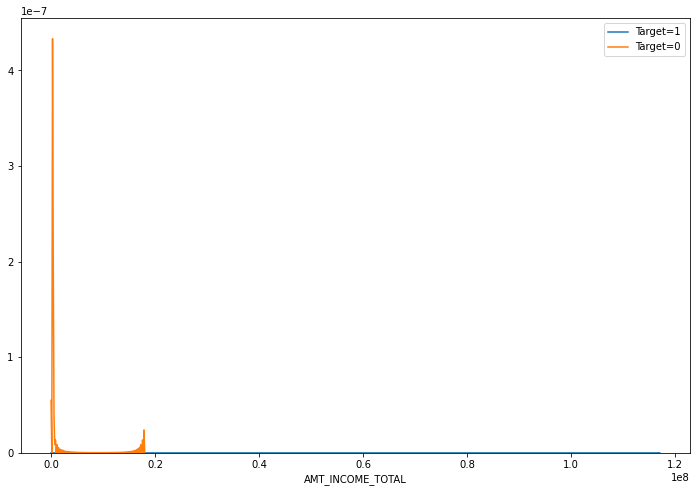

In [37]:
# Plotting the distribuion plot for AMT_INCOME_TOTAL for both default and NON_default dataframes
plt.figure(figsize=(12,8))
sns.distplot(default['AMT_INCOME_TOTAL'],hist=False,label='Target=1')
sns.distplot(NON_default['AMT_INCOME_TOTAL'],hist=False,label='Target=0')
plt.show()

The plot shows the customers who have defaulted on the loan have very low income

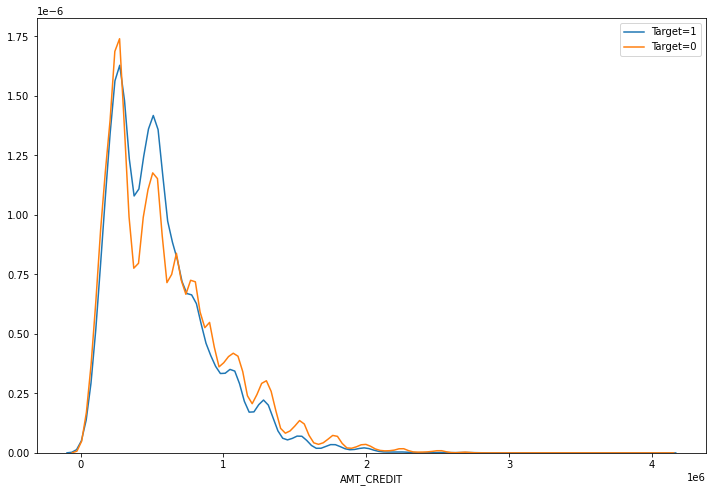

In [38]:
# Plotting the AMT_CREDIT column for both default and NON_default dataframes
plt.figure(figsize=(12,8))
sns.distplot(default['AMT_CREDIT'],hist=False,label='Target=1')
sns.distplot(NON_default['AMT_CREDIT'],hist=False,label='Target=0')
plt.show()

The above plot is the representation of AMT_CREDIT to both sets of customers. Both the customer sets have been given similar AMT_CREDIT.

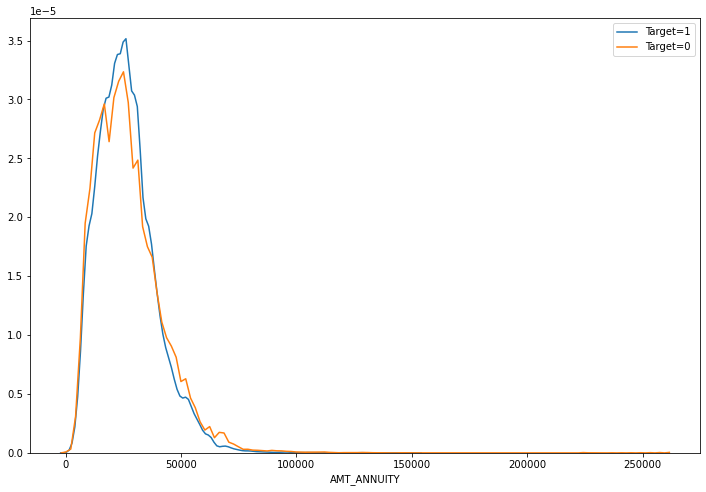

In [39]:
# Plotting AMT_ANNUITY
plt.figure(figsize=(12,8))
sns.distplot(default['AMT_ANNUITY'],hist=False,label='Target=1')
sns.distplot(NON_default['AMT_ANNUITY'],hist=False,label='Target=0')
plt.show()

The plots show a similar pattern for both sets of customers having recieved the same Loan Amount

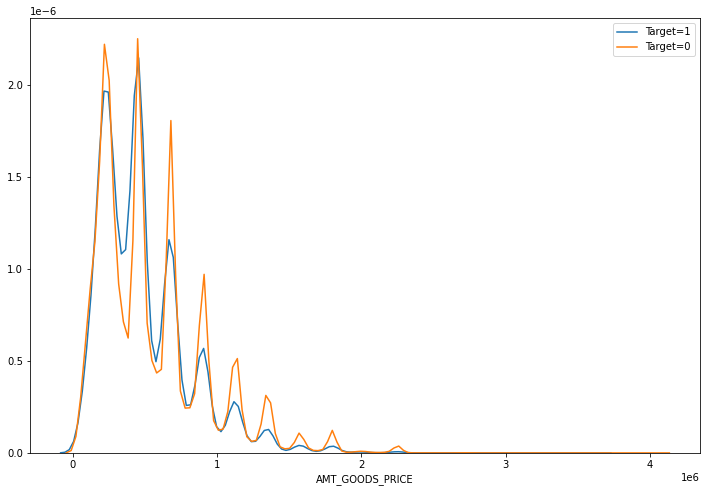

In [40]:
# Plotting AMT_GOODS_PRICE
plt.figure(figsize=(12,8))
sns.distplot(default['AMT_GOODS_PRICE'],hist=False,label='Target=1')
sns.distplot(NON_default['AMT_GOODS_PRICE'],hist=False,label='Target=0')
plt.show()

For the consumer loans both the customer segments show inverse relation in the price of the goods for which the loan was approved for most of the customers. The customers who have defaulted have taken loans for goods costing less than the goods purchased by the customers who have not defaulted the loan.

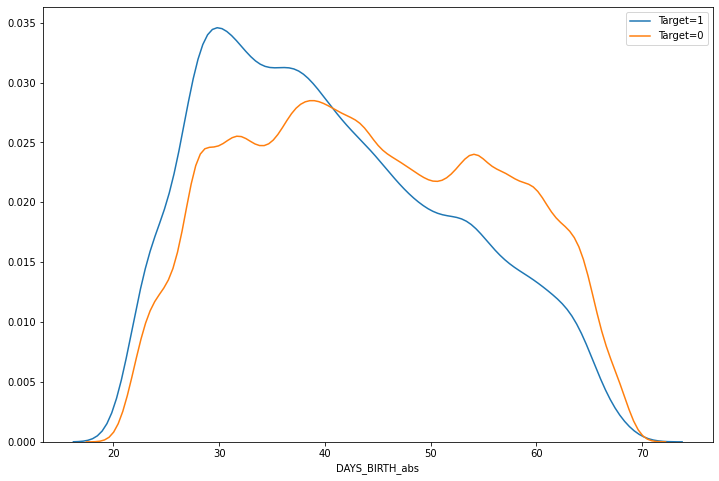

In [41]:
# Plot for DAYS_BIRTH_abs
plt.figure(figsize=(12,8))
sns.distplot(default['DAYS_BIRTH_abs'],hist=False,label='Target=1')
sns.distplot(NON_default['DAYS_BIRTH_abs'],hist=False,label='Target=0')
plt.show()

The customers who have defaulted shows a peak in the range of 30-40 DAYS_BIRTH (i.e., from the time of application of the loan)

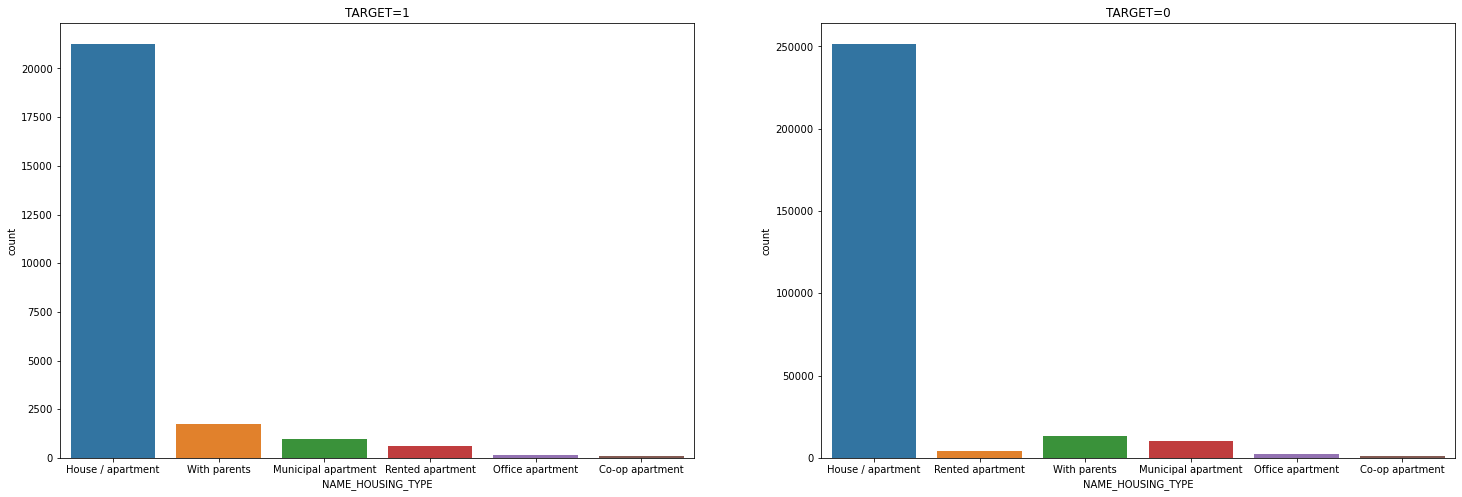

In [42]:
# Plotting NAME_HOUSING_TYPE column
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(default['NAME_HOUSING_TYPE'])
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(NON_default['NAME_HOUSING_TYPE'])
plt.title("TARGET=0")

plt.show()

The subplots show the types of housing situations the customers from both default & non default segments. The highest number of customers in the default list own a house or apartment. This is the case with customers who have not defaulted the loan too.

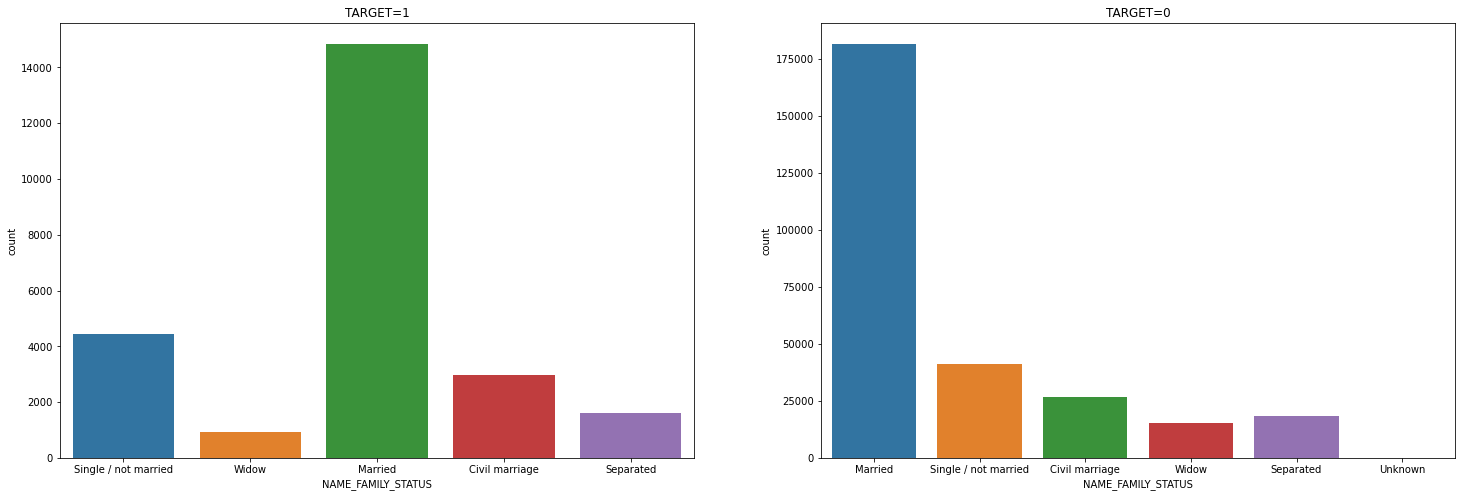

In [43]:
# Plotting the NAME_FAMILY_STATUS column
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(default['NAME_FAMILY_STATUS'])
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(NON_default['NAME_FAMILY_STATUS'])
plt.title("TARGET=0")

plt.show()

The plots show the Family Status of the customers in the 2 segments. The highest number of defaulters are married and the highest number of non defaulters are also married.

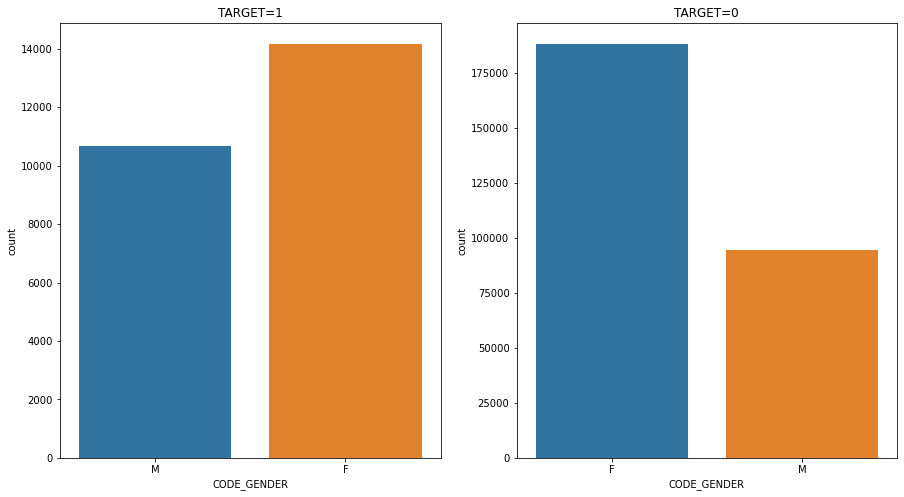

In [44]:
# Plotting the CODE_GENDER column
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(default['CODE_GENDER'])
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(NON_default['CODE_GENDER'])
plt.title("TARGET=0")

plt.show()

From these subplots we come to know that the highest number of defaulters are Females and the highest number of non defaulters are also females.As Loans taken by females are more.

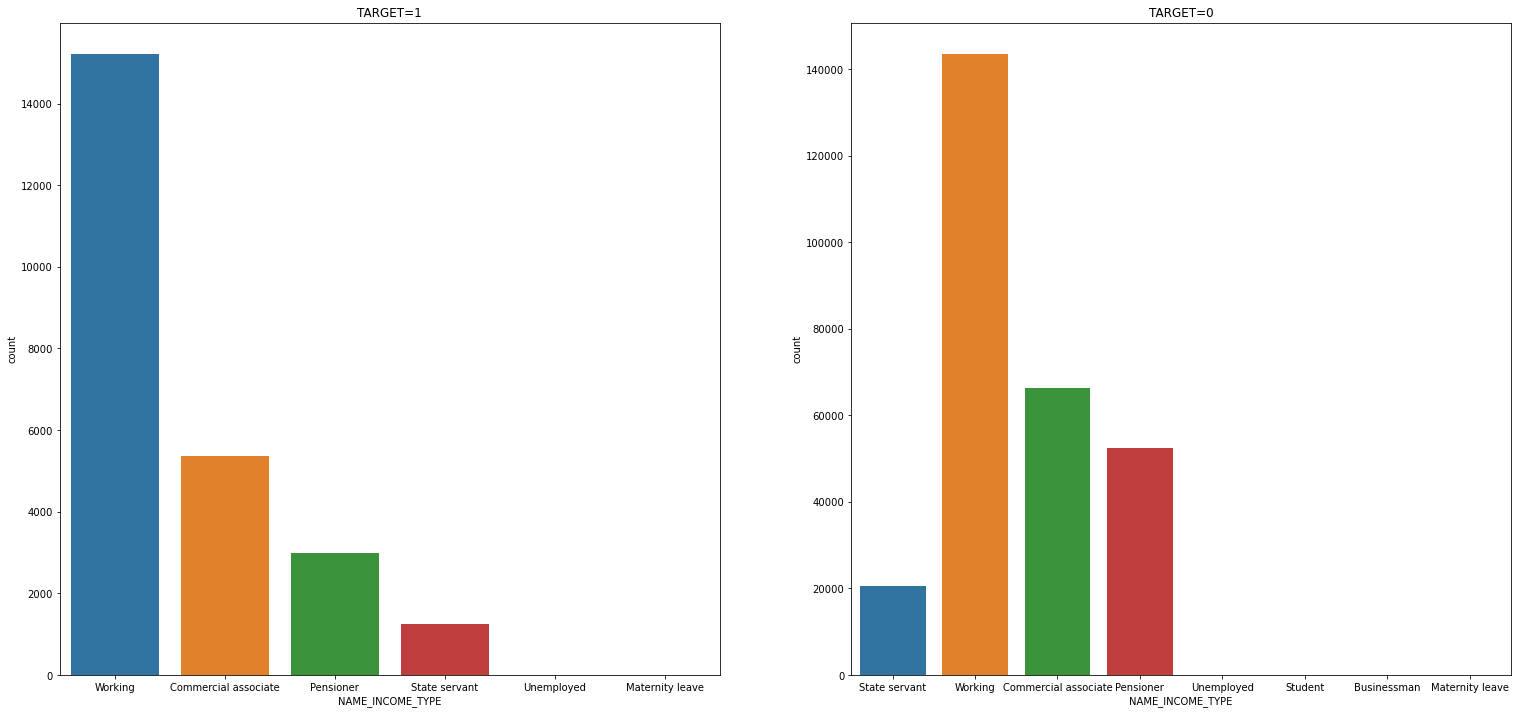

In [45]:
# Plotting the NAME_INCOME_TYPE column
plt.figure(figsize=(26,12))
plt.subplot(1,2,1)
sns.countplot(default['NAME_INCOME_TYPE'])
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(NON_default['NAME_INCOME_TYPE'])
plt.title("TARGET=0")

plt.show()

The highest number of customers who have defaulted the loan are from the working class. The highest non defaulters also belong to working class.

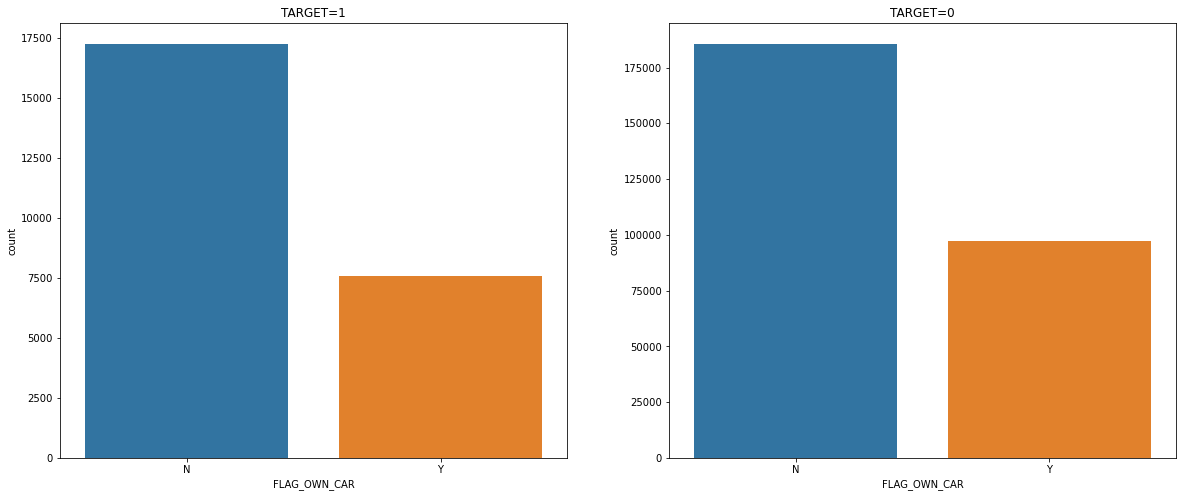

In [46]:
# Plotting the FALG_OWN_CAR column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(default['FLAG_OWN_CAR'])
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(NON_default['FLAG_OWN_CAR'])
plt.title("TARGET=0")

plt.show()

The customers who do not own a car are highest in both the list of defaulters and non defaulters

#### Bivariate Analaysis

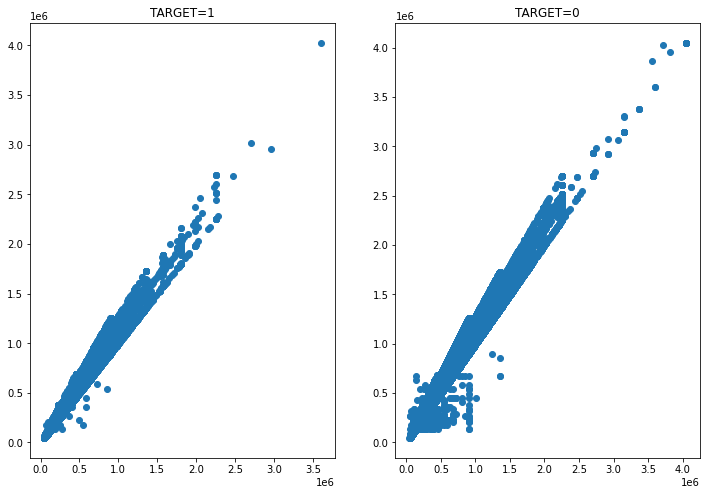

In [47]:
# Bivarirate Analysis for AMT_GOODS_PRICE & AMT_CREDIT
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(default['AMT_GOODS_PRICE'],default['AMT_CREDIT'])
plt.title('TARGET=1')

plt.subplot(1,2,2)
plt.scatter(NON_default['AMT_GOODS_PRICE'],NON_default['AMT_CREDIT'])
plt.title('TARGET=0')
plt.show()

The subplots show that both varibales AMT_GOODS_PRICE and AMT_CREDIT are strongly correlated for both the defaulters and non defaulters. This means AMT_credit has been in line of the cost of Goods purchased(AMT_GOODS_PRICE) by the customers.

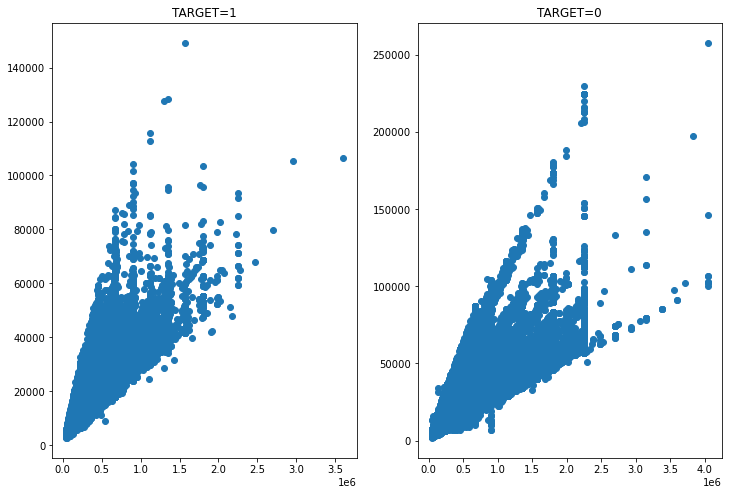

In [48]:
#Plotting AMT_GOODS_PRICE & AMT_ANNUITY
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(default['AMT_GOODS_PRICE'],default['AMT_ANNUITY'])
plt.title('TARGET=1')

plt.subplot(1,2,2)
plt.scatter(NON_default['AMT_GOODS_PRICE'],NON_default['AMT_ANNUITY'])
plt.title('TARGET=0')
plt.show()

AMT_GOODS_PRICE & AMT_ANNUITY are strongly correlated in the plots, which would mean that for consumer loans the loan amount approved would have been in line with price of the goods being purchased.

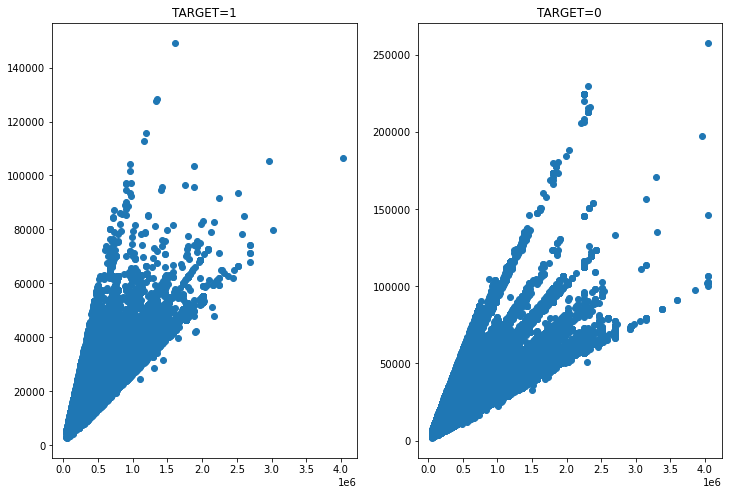

In [49]:
# Plotting AMT_CREDIT & AMT_ANNUITY
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(default['AMT_CREDIT'],default['AMT_ANNUITY'])
plt.title('TARGET=1')

plt.subplot(1,2,2)
plt.scatter(NON_default['AMT_CREDIT'],NON_default['AMT_ANNUITY'])
plt.title('TARGET=0')
plt.show()

The AMT_CREDIT & AMT_ANNUITY variables are strongly correlated for both the customer segments, showing directly proportional relationship.

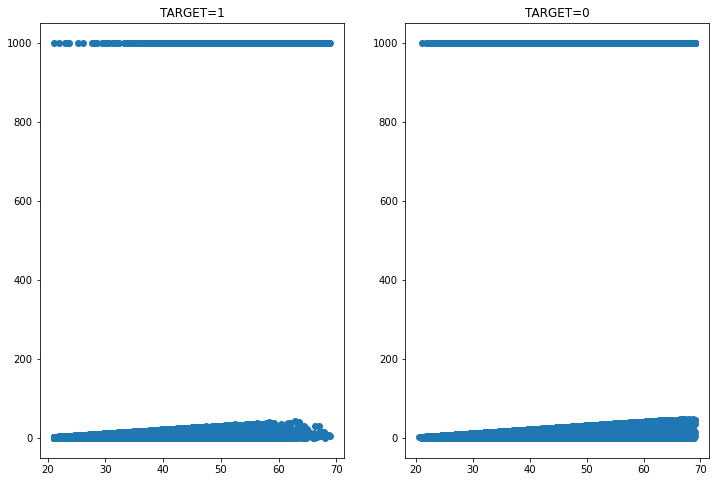

In [50]:
#Plotting DAYS_BIRTH_abs & DAYS_EMPLOYED_abs
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(default['DAYS_BIRTH_abs'],default['DAYS_EMPLOYED_abs'])
plt.title('TARGET=1')

plt.subplot(1,2,2)
plt.scatter(NON_default['DAYS_BIRTH_abs'],NON_default['DAYS_EMPLOYED_abs'])
plt.title('TARGET=0')
plt.show()

**Inferences: Age group between 50-70 are more employed.**

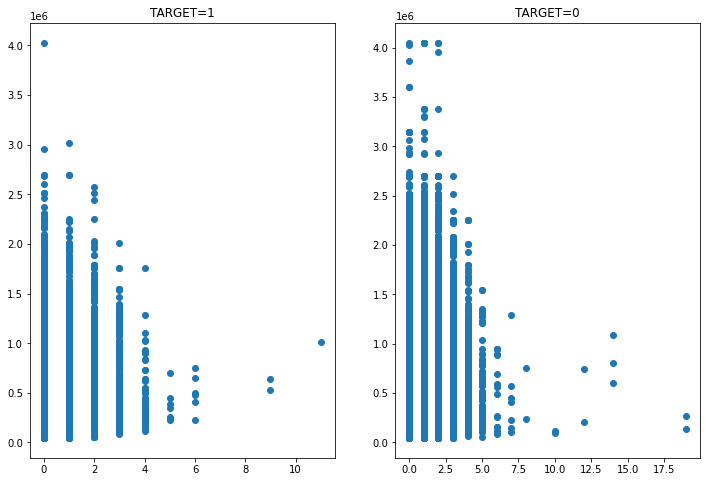

In [51]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(default['CNT_CHILDREN'],default['AMT_CREDIT'])
plt.title('TARGET=1')

plt.subplot(1,2,2)
plt.scatter(NON_default['CNT_CHILDREN'],NON_default['AMT_CREDIT'])
plt.title('TARGET=0')
plt.show()

**Inferences: there outlires in number of children**

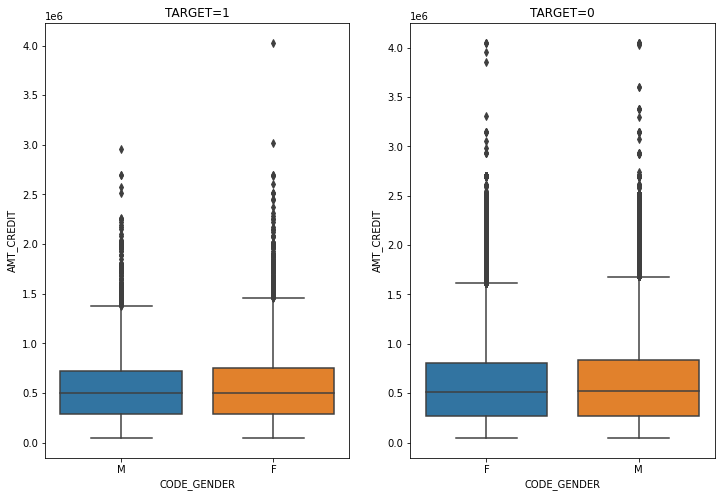

In [52]:
#Plotting CODE_GENDER & AMT_CREDIT
plt.figure(figsize=(12,8))   
plt.subplot(1,2,1)
sns.boxplot(x='CODE_GENDER',y='AMT_CREDIT',data=default)
plt.title('TARGET=1')

plt.subplot(1,2,2)
sns.boxplot(x='CODE_GENDER',y='AMT_CREDIT',data=NON_default)
plt.title('TARGET=0')
plt.show()

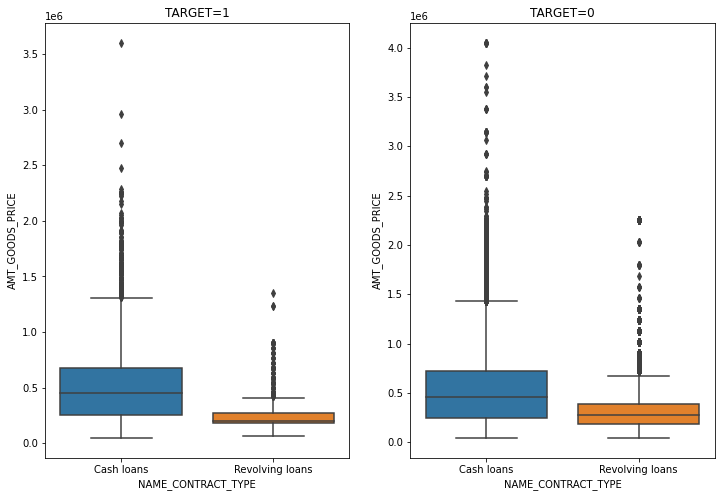

In [53]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x='NAME_CONTRACT_TYPE',y='AMT_GOODS_PRICE',data=default)
plt.title('TARGET=1')

plt.subplot(1,2,2)
sns.boxplot(x='NAME_CONTRACT_TYPE',y='AMT_GOODS_PRICE',data=NON_default)
plt.title('TARGET=0')
plt.show()

**Inferences: Revolving loans have less amount of goods prices for which loans are taken**

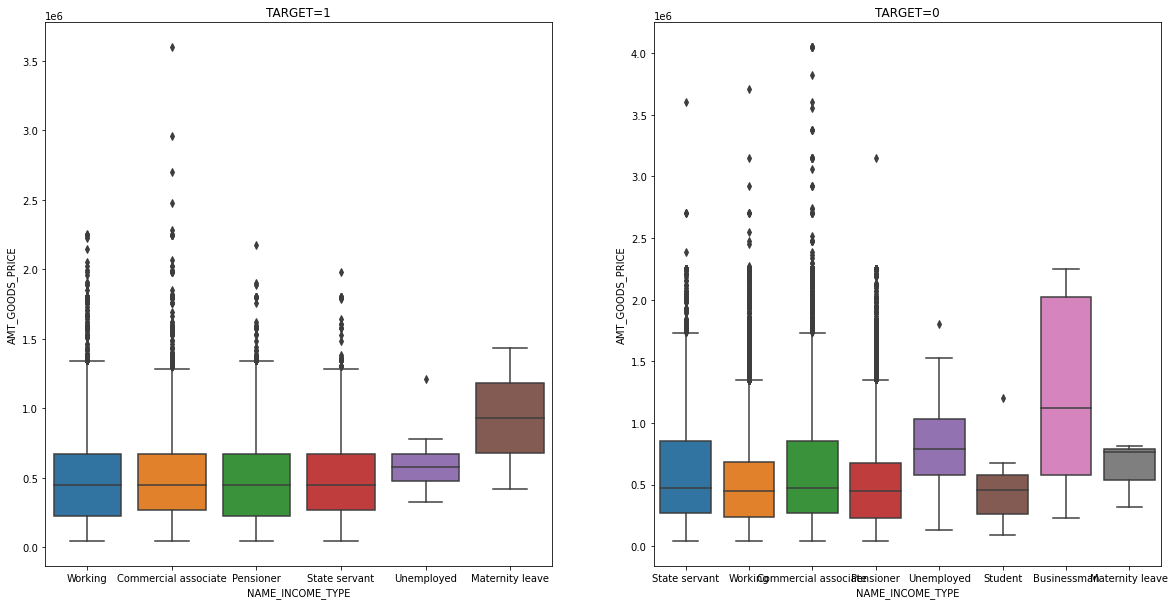

In [54]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE',data=default)
plt.title('TARGET=1')

plt.subplot(1,2,2)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE',data=NON_default)
plt.title('TARGET=0')
plt.show()

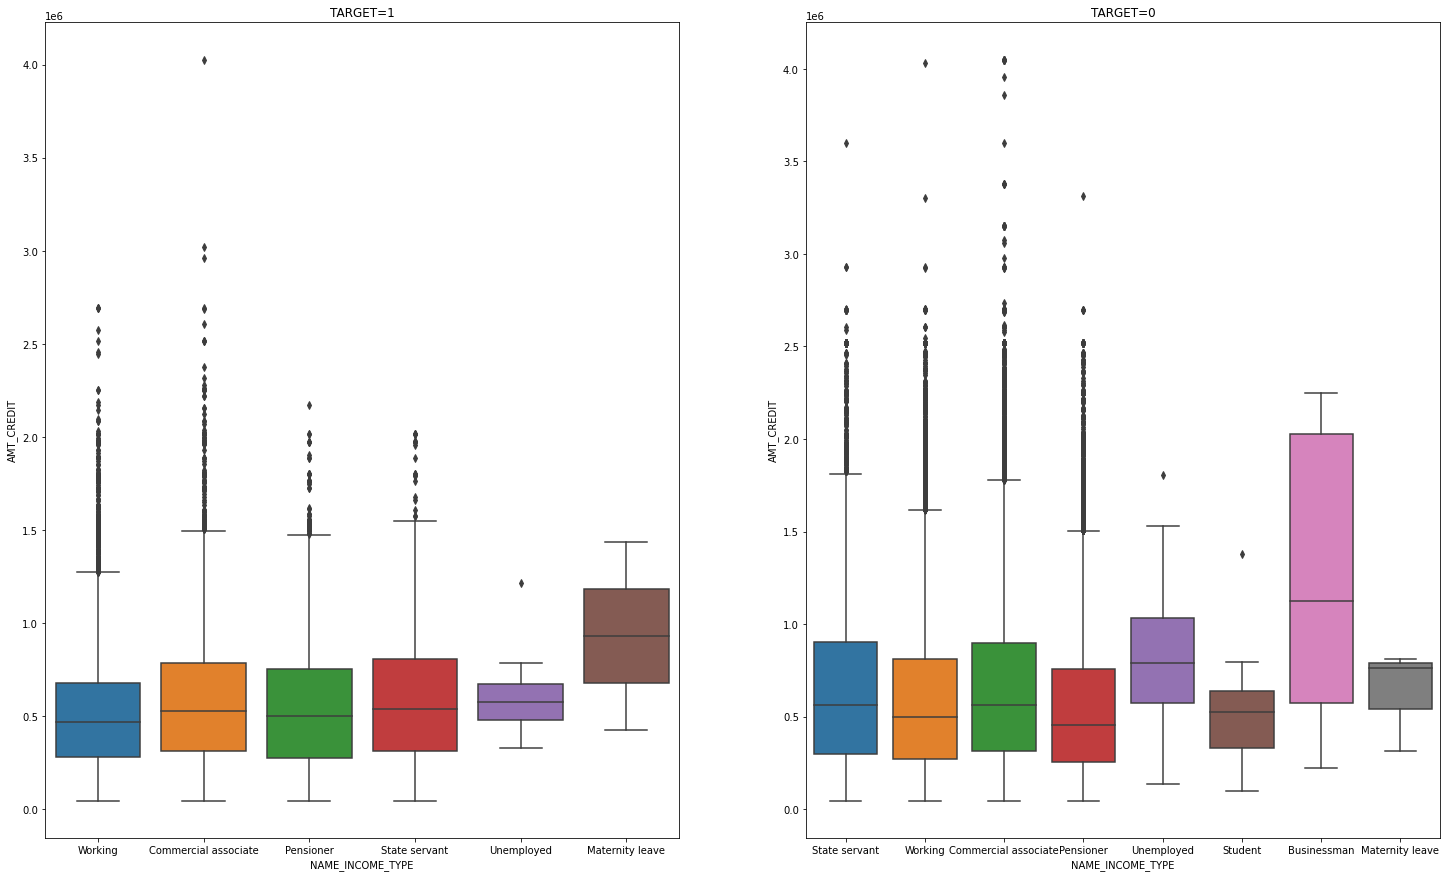

In [55]:
plt.figure(figsize=(25,15))
plt.subplot(1,2,1)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT',data=default)
plt.title('TARGET=1')

plt.subplot(1,2,2)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT',data=NON_default)
plt.title('TARGET=0')
plt.show()

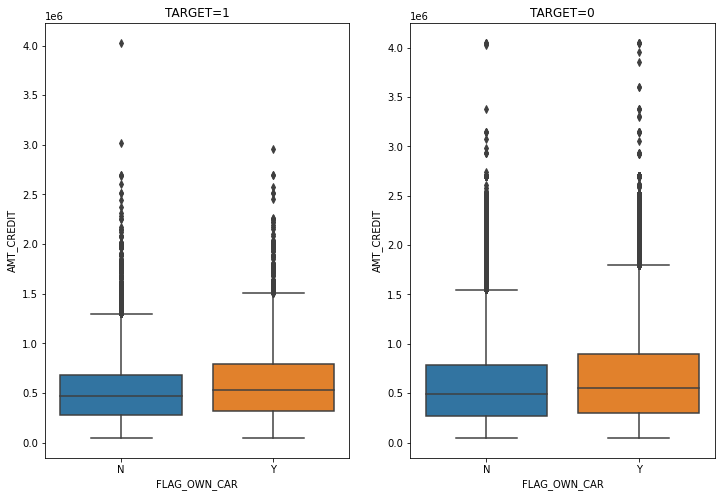

In [56]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x='FLAG_OWN_CAR',y='AMT_CREDIT',data=default)
plt.title('TARGET=1')

plt.subplot(1,2,2)
sns.boxplot(x='FLAG_OWN_CAR',y='AMT_CREDIT',data=NON_default)
plt.title('TARGET=0')
plt.show()

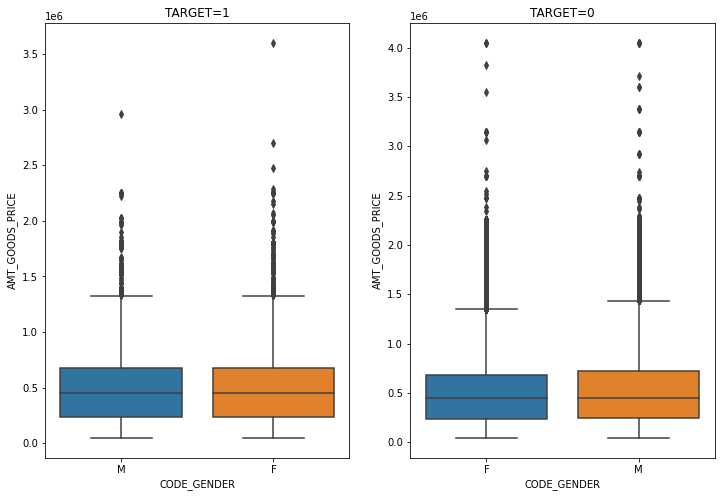

In [57]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x='CODE_GENDER',y='AMT_GOODS_PRICE',data=default)
plt.title('TARGET=1')

plt.subplot(1,2,2)
sns.boxplot(x='CODE_GENDER',y='AMT_GOODS_PRICE',data=NON_default)
plt.title('TARGET=0')
plt.show()

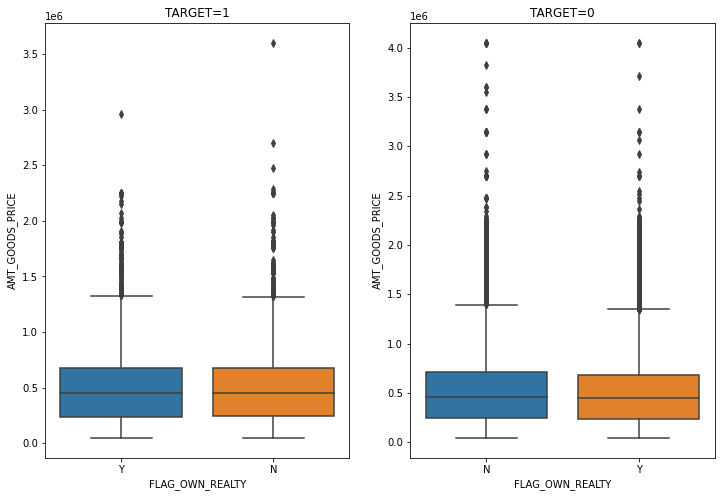

In [58]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x='FLAG_OWN_REALTY',y='AMT_GOODS_PRICE',data=default)
plt.title('TARGET=1')

plt.subplot(1,2,2)
sns.boxplot(x='FLAG_OWN_REALTY',y='AMT_GOODS_PRICE',data=NON_default)
plt.title('TARGET=0')
plt.show()

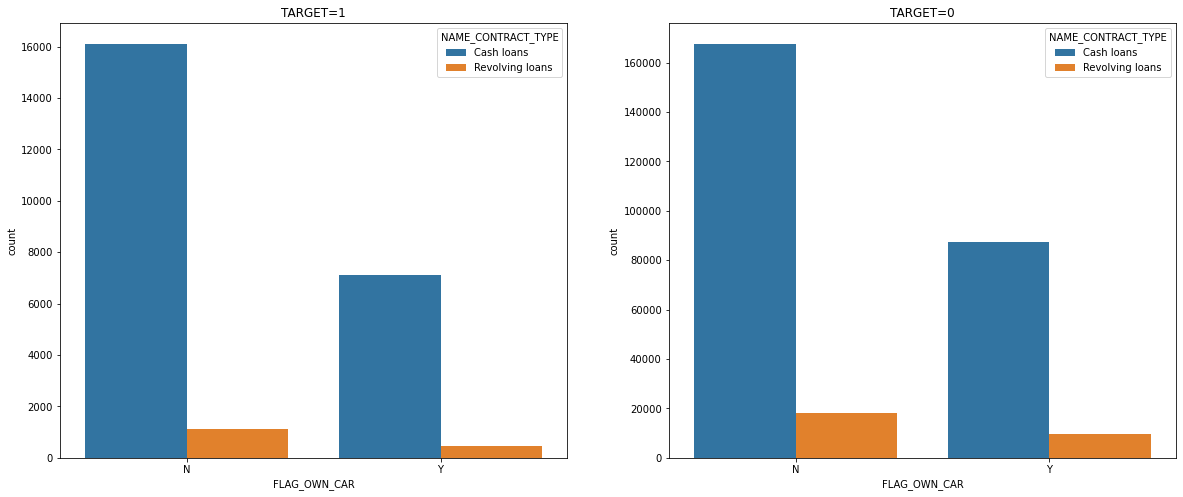

In [59]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='FLAG_OWN_CAR',hue='NAME_CONTRACT_TYPE',data=default)
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_CAR',hue='NAME_CONTRACT_TYPE',data=NON_default)
plt.title("TARGET=0")

plt.show()

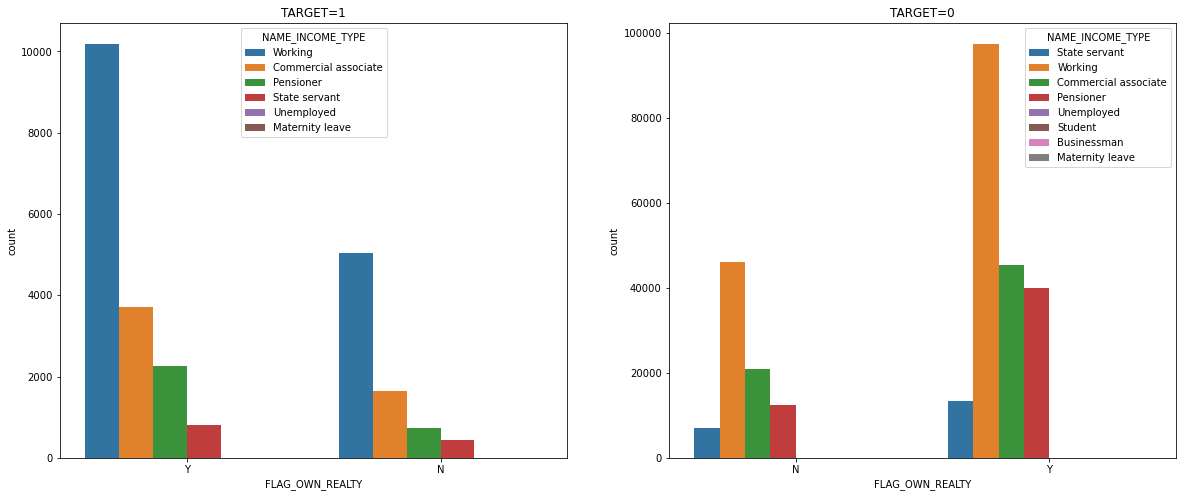

In [60]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='FLAG_OWN_REALTY',hue='NAME_INCOME_TYPE',data=default)
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_REALTY',hue='NAME_INCOME_TYPE',data=NON_default)
plt.title("TARGET=0")

plt.show()

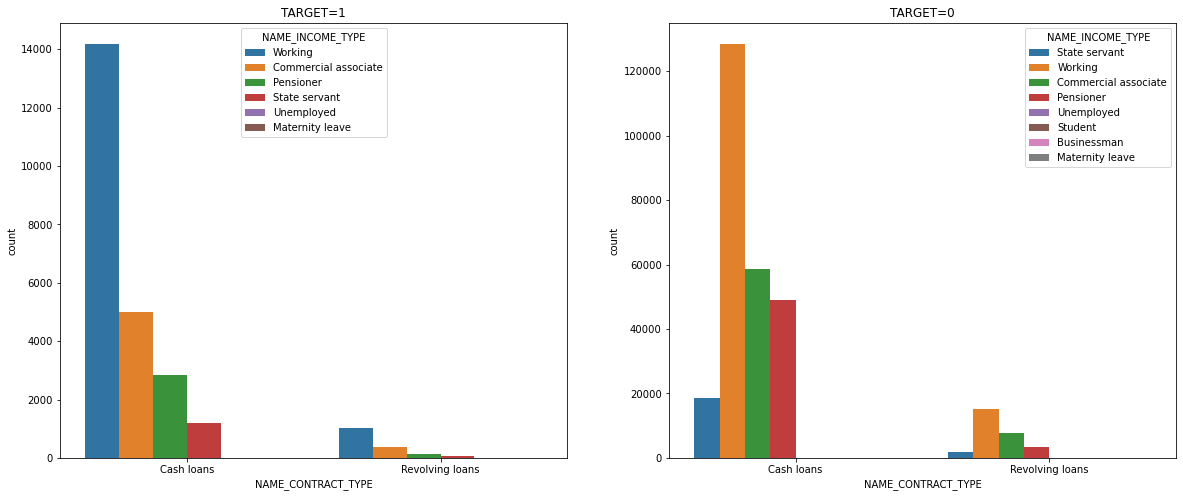

In [61]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_INCOME_TYPE',data=default)
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_INCOME_TYPE',data=NON_default)
plt.title("TARGET=0")

plt.show()

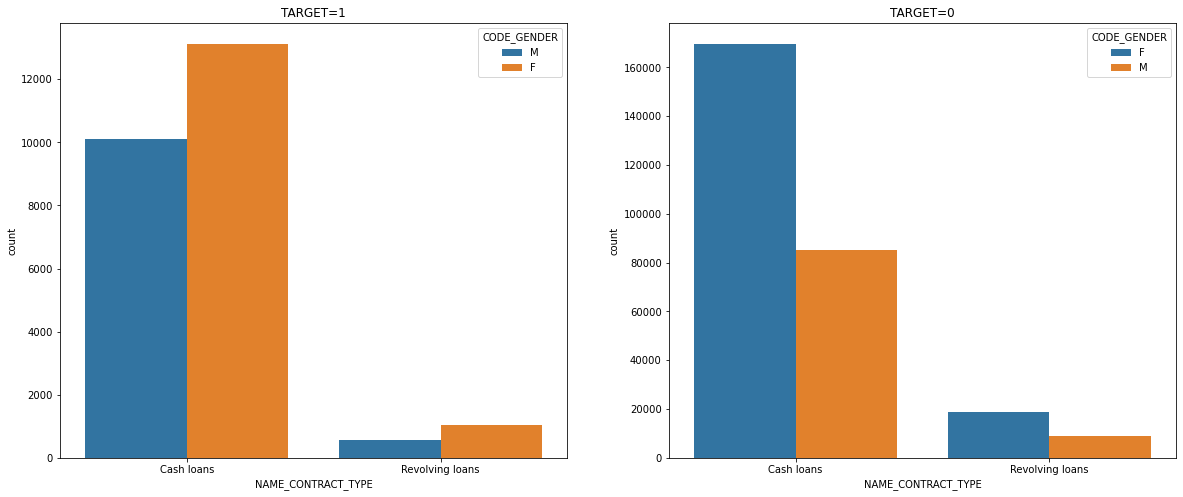

In [62]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',data=default)
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',data=NON_default)
plt.title("TARGET=0")

plt.show()

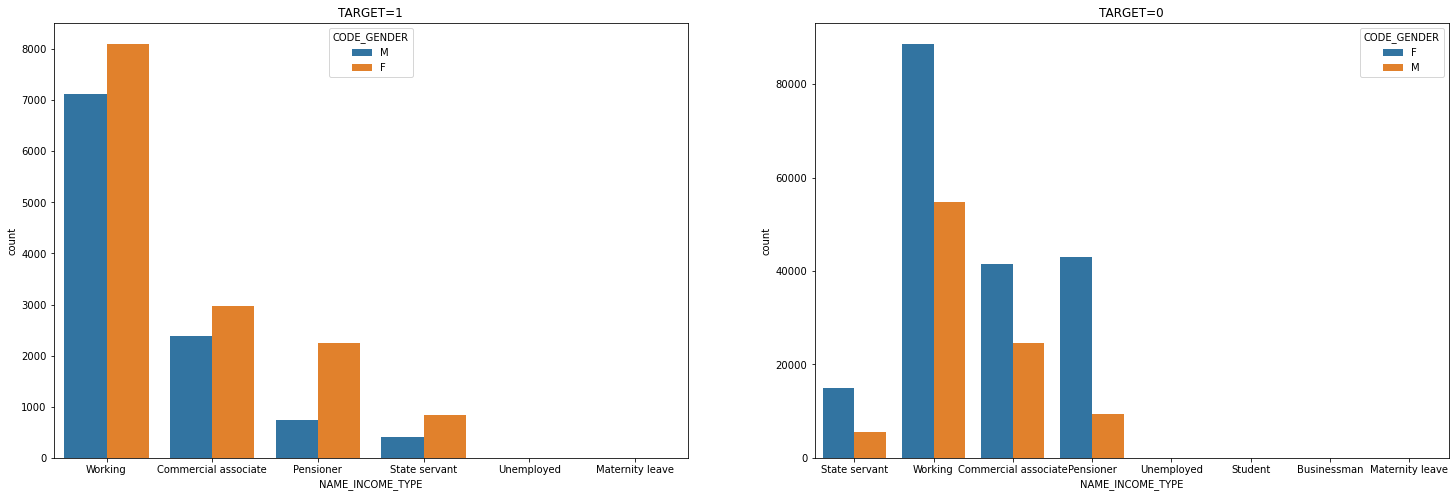

In [63]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=default)
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=NON_default)
plt.title("TARGET=0")

plt.show()

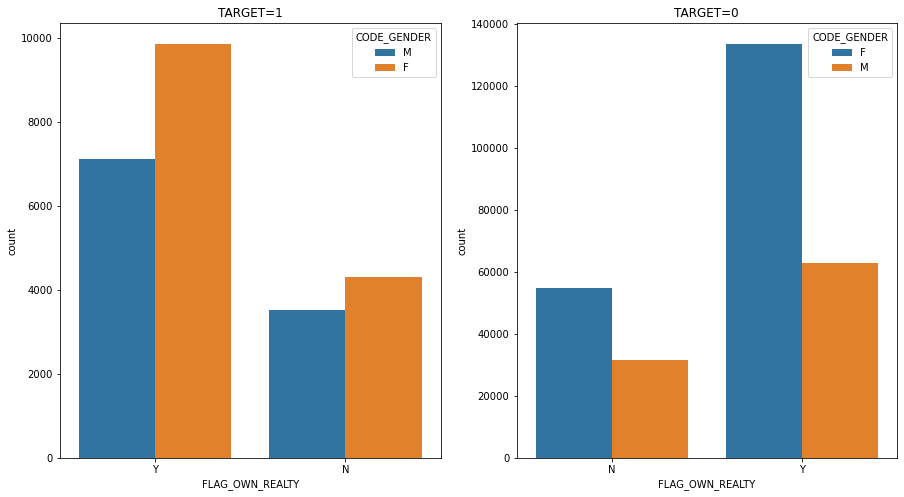

In [64]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x='FLAG_OWN_REALTY',hue='CODE_GENDER',data=default)
plt.title("TARGET=1")

plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_REALTY',hue='CODE_GENDER',data=NON_default)
plt.title("TARGET=0")

plt.show()

**Inferences: Females have more own flat/ house than males**

In [65]:
##ANALYSIS ON PREVIOUS APPLICATION
df2= pd.read_csv("previous_application.csv")
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# shape of data
df2.shape

(1670214, 37)

In [67]:
# describing the data
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [68]:
# percentage of null values
df2.isnull().sum()/len(df2)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

**Inferences: there columns which have more than 90% & 50% of NAN values we should drop those columns.**

In [69]:
# data type of data set
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

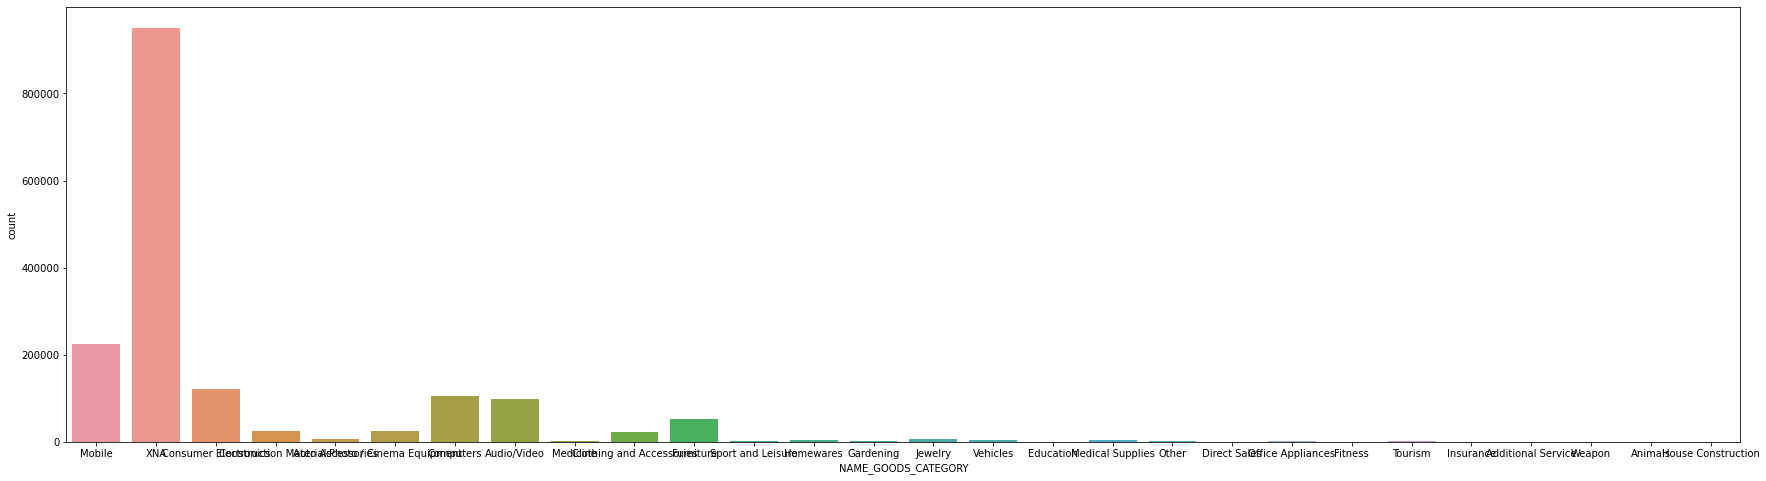

In [70]:
# countplot of plot NAME_GOODS_CATEGORY
plt.figure(figsize=(30,8))
sns.countplot(df2['NAME_GOODS_CATEGORY'])
plt.show()

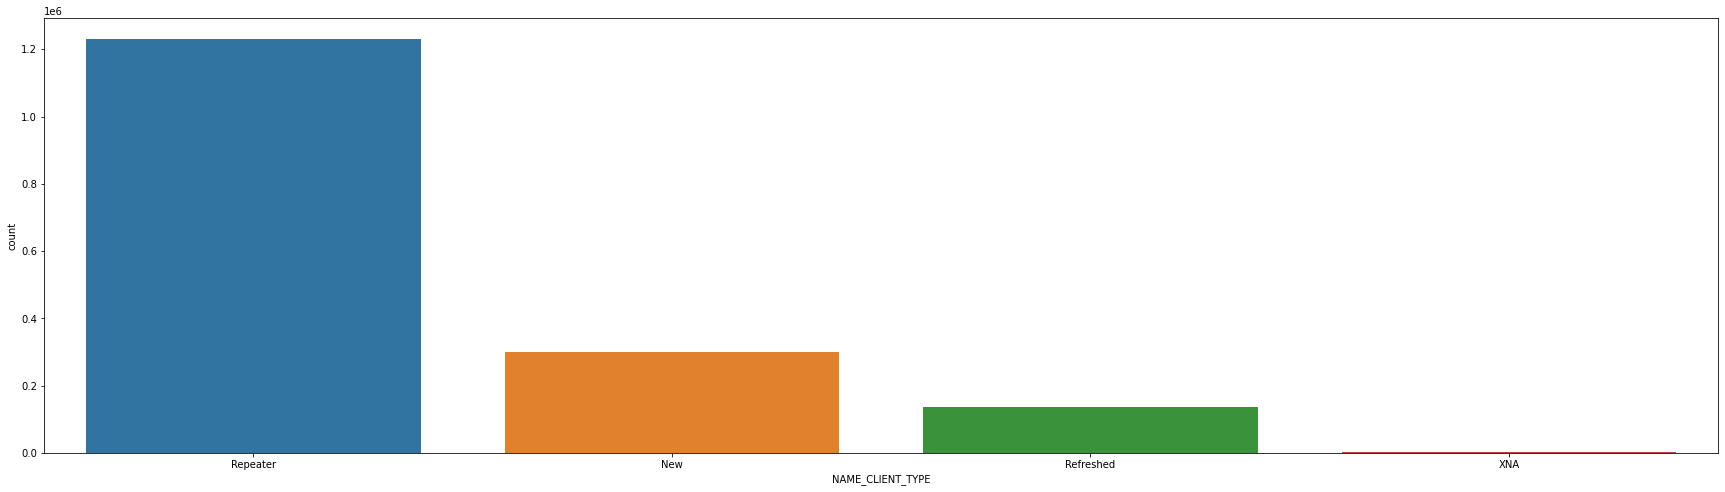

In [71]:
#countplot of NAME_CLIENT_TYPE
plt.figure(figsize=(30,8))
sns.countplot(df2['NAME_CLIENT_TYPE'])
plt.show()

**Inferences: Most of the clients are repeaters.**

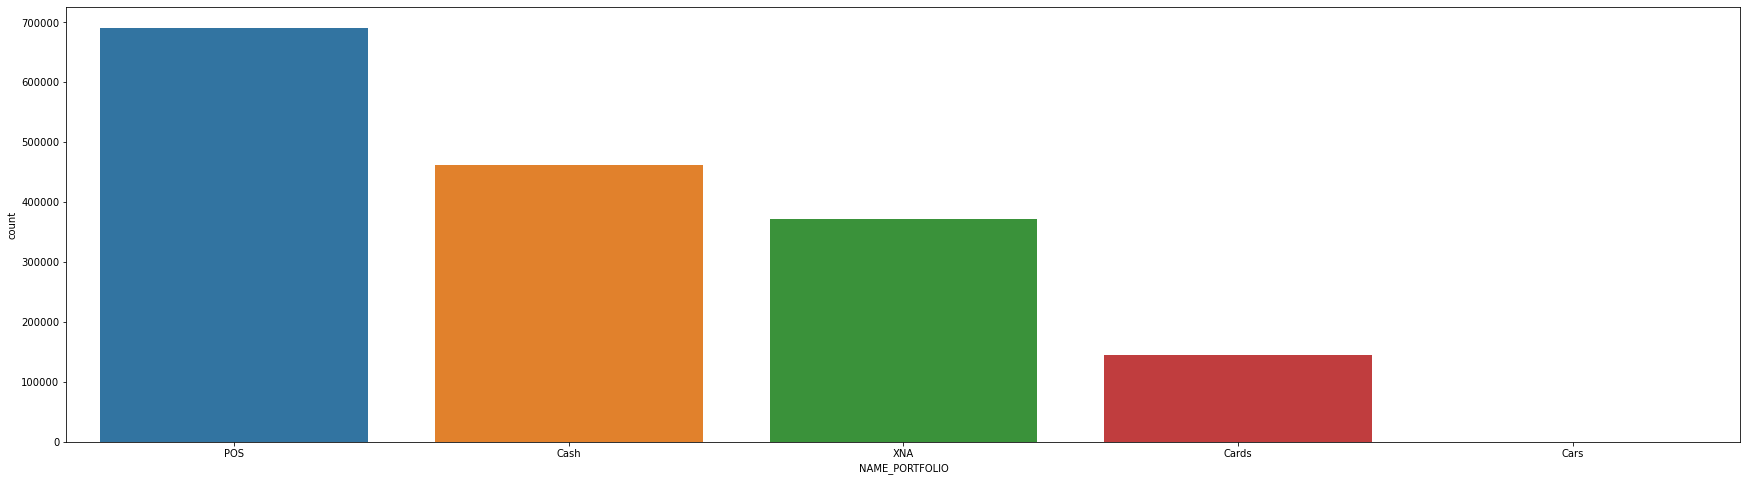

In [72]:
plt.figure(figsize=(30,8))
sns.countplot(df2['NAME_PORTFOLIO'])
plt.show()

In [81]:
# CORRELATION 
df2.corr()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,-0.000321,0.011459,0.003302,0.003659,-0.001313,0.015293,-0.002652,-0.002828,-0.004051,0.012969,-0.022312,0.019100,-0.001079,0.015589,-0.001478,-0.000071,0.001222,0.001915,0.001781,0.003986
SK_ID_CURR,-0.000321,1.000000,0.000577,0.000280,0.000195,-0.000063,0.000369,0.002842,0.000098,0.001158,0.033197,-0.016757,-0.000637,0.001265,0.000031,-0.001329,-0.000757,0.000252,-0.000318,-0.000020,0.000876
AMT_ANNUITY,0.011459,0.000577,1.000000,0.808872,0.816429,0.267694,0.820895,-0.036201,0.020639,-0.103878,0.141823,-0.202335,0.279051,-0.015027,0.394535,0.052839,-0.053295,-0.068877,0.082659,0.068022,0.283080
AMT_APPLICATION,0.003302,0.000280,0.808872,1.000000,0.975824,0.482776,0.999884,-0.014415,0.004310,-0.072479,0.110001,-0.199733,0.133660,-0.007649,0.680630,0.074544,-0.049532,-0.084905,0.172627,0.148618,0.259219
AMT_CREDIT,0.003659,0.000195,0.816429,0.975824,1.000000,0.301284,0.993087,-0.021039,-0.025179,-0.188128,0.125106,-0.205158,0.133763,-0.009567,0.674278,-0.036813,0.002881,0.044031,0.224829,0.214320,0.263932
AMT_DOWN_PAYMENT,-0.001313,-0.000063,0.267694,0.482776,0.301284,1.000000,0.482776,0.016776,0.001597,0.473935,0.016323,-0.115343,-0.024536,0.003533,0.031659,-0.001773,-0.013586,-0.000869,-0.031425,-0.030702,-0.042585
AMT_GOODS_PRICE,0.015293,0.000369,0.820895,0.999884,0.993087,0.482776,1.000000,-0.045267,-0.017100,-0.072479,0.110001,-0.199733,0.290422,-0.015842,0.672129,-0.024445,-0.021062,0.016883,0.211696,0.209296,0.243400
HOUR_APPR_PROCESS_START,-0.002652,0.002842,-0.036201,-0.014415,-0.021039,0.016776,-0.045267,1.000000,0.005789,0.025930,-0.027172,-0.045720,-0.039962,0.015671,-0.055511,0.014321,-0.002797,-0.016567,-0.018018,-0.018254,-0.117318
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000098,0.020639,0.004310,-0.025179,0.001597,-0.017100,0.005789,1.000000,0.004554,0.009604,0.024640,0.016555,0.000912,0.063347,-0.000409,-0.002288,-0.001981,-0.002277,-0.000744,-0.007124
RATE_DOWN_PAYMENT,-0.004051,0.001158,-0.103878,-0.072479,-0.188128,0.473935,-0.072479,0.025930,0.004554,1.000000,-0.103373,-0.106143,-0.208742,-0.006489,-0.278875,-0.007969,-0.039178,-0.010934,-0.147562,-0.145461,-0.021633


**Inferences:AMT_APPLICATION & AMT_GOODS_PRICE ,AMT_CREDIT & AMT_GOODS_PRICE ,AMT_ANNUITY & AMT_GOODS_PRICE are highly co-related**

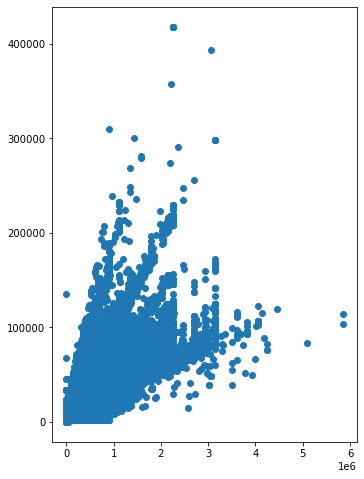

In [76]:
# SCATTERPLT BET AMT_GOODS_PRICE & AMT_ANNUITY 
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(df2['AMT_GOODS_PRICE'],df2['AMT_ANNUITY'])
plt.show()

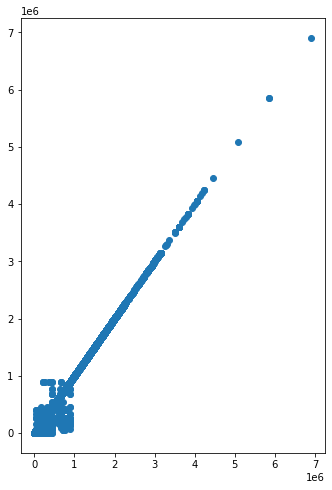

In [78]:
# SCATTERPLT BET AMT_GOODS_PRICE & AMT_APPLICATION
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(df2['AMT_GOODS_PRICE'],df2['AMT_APPLICATION'])
plt.show()

**Inferences:credit client ask on the previous application have some linear relation with amount of goods price on which loan taken**